In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pandas import *

0.5776153625680711
[ 15.52238177   0.21196256] paramates for the fit
r^2 of the fit: [[  9.50572539e-01  -3.78085753e-04]
 [ -3.78085753e-04   1.76916130e-05]]
std devi on fitted parameters: [ 0.9749731   0.00420614]
half of all offers get accepted at: 0.61
[0.0, 0.0, 0.07142857142857142, 0.047619047619047616, 0.23809523809523808, 0.5476190476190477, 0.09523809523809523, 0.0, 0.0, 0.0]
mean of pay: 0.456
std of pay: 0.0989458726491
wo 0.353353353353


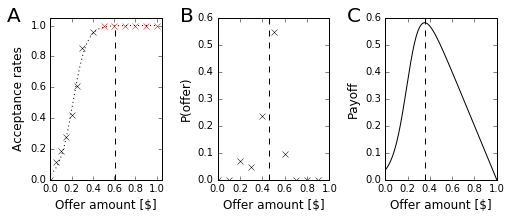

In [10]:
from pandas import *
import scipy.optimize as optimization


def logistic(x,k,x0):
    return 1.0/(1.0+exp(-(k*(x-x0))))

    
ar_values=[0.0,0.5,1.0,1.5,2.0,2.5,3,4,5,6,7,8,9,10]
ar=[0.0,0.1159,0.1884,0.2754,0.4203,0.6087,0.8551,0.9565,1.0,1.0,1.0,1.0,1.0,1.0]
m=0.0
D=0.0
for i in range(0,len(ar_values)):
    ar_values[i]=ar_values[i]/10.0
figure(num=None, figsize=(8,3), dpi=80, facecolor='w', edgecolor='k')
subplots_adjust(wspace=.50)
subplots_adjust(hspace=.25) 
subplots_adjust(bottom=.15)
for i in range(0,len(ar)):
    m=m+(float(ar[i])*float(ar_values[i]))
    D=D+float(ar[i])
m=m/D
subplot(1,3,1),plot(ar_values[:8],ar[:8],'xk')
subplot(1,3,1),plot(ar_values[8:],ar[8:],'xr')
#plot((m,m),(0,1.05),'--k')
axis((0,1.05,0,1.05))
print (m)

#P=polyfit(ar_values,ar,5)
#Y=polyval(P,ar_values)
#,plot(ar_values,Y,':k')
X=linspace(0,1,101)
p1,p2=optimization.curve_fit(logistic, ar_values, ar)
print ("{0} paramates for the fit".format(p1))
print ("r^2 of the fit: {0}".format(p2))
print ("std devi on fitted parameters: {0}".format(np.sqrt(np.diag(p2))))
subplot(1,3,1),plot(X,logistic(X,p1[0],p1[1]),":k")
h=(logistic(1.0,p1[0],p1[1])-logistic(0.0,p1[0],p1[1]))
x=linspace(0.0,1.0,101)
y=[]
for i in x:
    y.append(logistic(i,p1[0],p1[1]))

surface=sum(y)
acc=0.0
for i in range(len(y)):
    if (acc<(surface/2.0)) and ((acc+y[i])>(surface/2.0)):
        subplot(1,3,1),plot((x[i],x[i]),(0,1),'--k')
        print ("half of all offers get accepted at: {0}".format(x[i]))
    acc=acc+y[i]
#print h/2.0
#y=[]
#x=[]
#lv=0.0
#for i in range(0,10000):
#    v=float(i)/10000.0
#    x.append(v)
#    nv=logistic(v,p1[0],p1[1])#I(P,v)
#    y.append(nv)
#    if (lv<(h/2.0)) & (nv>(h/2.0)):
#        subplot(1,3,1),plot((v,v),(0,1),'--g')
#        print v
#    lv=nv
ylabel('Acceptance rates',fontsize=12)
xlabel('Offer amount [$]',fontsize=12)
pay=[2,2.5,2.5,1,2.5,1,3,2.5,2.5,2,2.5,2.5,2.5,2.5,2.5,2,2.75,2,1,1.5,2.5,2,1.5,3,2,2,2.51,2.5,2,2.5,2.5,2.5,3,2.5,2,2.5,2,2.5,2.5,2.5,2.5,3]
for i in range(0,len(pay)):
    pay[i]=(pay[i]/5.0)
H=histogram(pay,[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
S=float(sum(H[0]))
offerY=[]
for i in range(0,len(H[0])):
    offerY.append(float(H[0][i])/float(S))
offerX=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
subplot(1,3,2),plot(offerX,offerY,'xk')
offerP=polyfit(offerX,offerY,5)
print (offerY)
#subplot(1,2,2),plot(offerX,polyval(offerP,offerX),':b')
subplot(1,3,2),plot((mean(pay),mean(pay)),(0,1),'--k')
axis((0,1,0,0.6))
print ("mean of pay: "+str(mean(pay)))
print ("std of pay: "+str(std(pay)))
ylabel('P(offer)',fontsize=12)
xlabel('Offer amount [$]',fontsize=12)
A=[]
xRange=linspace(0.0,1.0,1000)
m=0.0
wo=-1.0
for xx in xRange:
    theVal=logistic(xx,p1[0],p1[1])*(1.0-xx)#polyval(P,xx)*(1.0-xx)
    A.append(theVal)
    if theVal>m:
        wo=xx
        m=theVal
subplot(1,3,3),plot(xRange,A,'k')
subplot(1,3,3),plot((wo,wo),(0,0.6),'--k')
print ("wo "+str(wo))
ylabel('Payoff',fontsize=12)
xlabel('Offer amount [$]',fontsize=12)
figtext(0.05,0.88,"A",fontsize=20)
figtext(0.35,0.88,"B",fontsize=20)
figtext(0.64,0.88,"C",fontsize=20)
savefig('acceptanceRate.pdf')
savefig('acceptanceRate.eps')

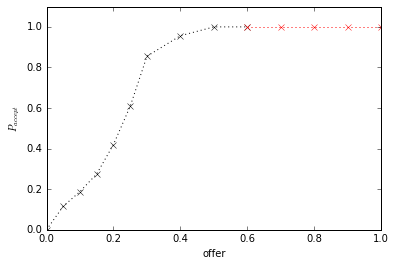

In [42]:
plot(ar_values[:10],ar[:10],'xk')
plot(ar_values[:10],ar[:10],':k')
plot(ar_values[9:],ar[9:],'xr')
plot(ar_values[9:],ar[9:],':r')
axis([0,1,0,1.1])
xlabel("offer")
ylabel(r"$P_{accept}$")
savefig("acceptanceRates.pdf")

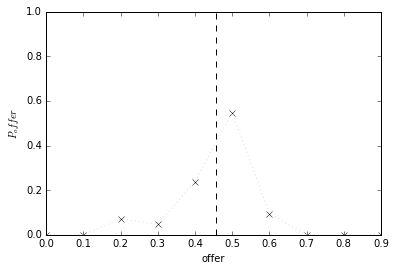

In [32]:
plot(offerX,offerY,"xk")
plot(offerX,offerY,":",color="#dddddd")
plot((mean(pay),mean(pay)),(0,1),'--k')
xlabel("offer")
ylabel(r"$P_offer$")
savefig("offerDistribution.pdf")

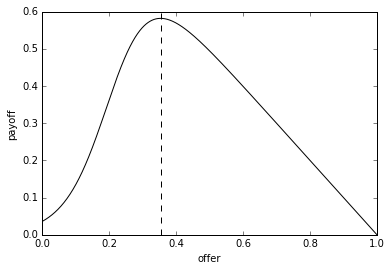

In [45]:
plot(xRange,A,'k')
plot((wo,wo),(0,0.6),'--k')
xlabel("offer")
ylabel("payoff")
savefig("optimalityOfOffer.pdf")

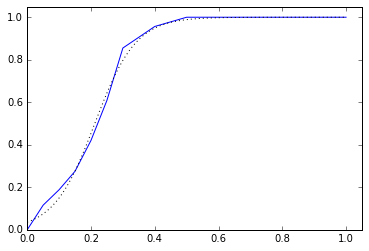

In [4]:
import scipy.optimize as optimization


def logistic(x,k,x0):
    return 1.0/(1.0+exp(-(k*(x-x0))))
    
ar_values=[0.0,0.5,1.0,1.5,2.0,2.5,3,4,5,6,7,8,9,10]
ar=[0.0,0.1159,0.1884,0.2754,0.4203,0.6087,0.8551,0.9565,1.0,1.0,1.0,1.0,1.0,1.0]
for i in range(0,len(ar_values)):
    ar_values[i]=ar_values[i]/10.0
#subplot(1,3,1),plot(ar_values[:8],ar[:8],'xk')
#subplot(1,3,1),plot(ar_values[8:],ar[8:],'xr')
plot(ar_values,ar)
axis((0,1.05,0,1.05))
X=linspace(0,1,101)
p1,p2=optimization.curve_fit(logistic, ar_values, ar)
plot(X,logistic(X,p1[0],p1[1]),":k")

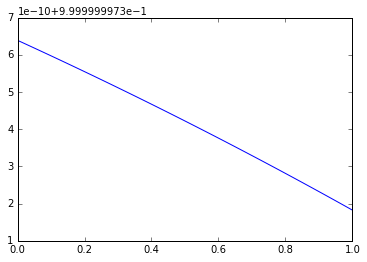

In [5]:
def logistic(x,k,x0):
    return 1.0/(1.0+exp(-(k*(x-x0))))

plot(X,logistic(100.0,0.2,X))